### Preprocessing Airbnb Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.preprocessing import LabelEncoder

Df_dataset = pd.read_csv('./DataSets/listings.csv')
Df_dataset

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,9.0,f,NaN,NaN,t,strict,f,f,8,0.34
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,NaN,f,NaN,NaN,f,strict,f,f,2,NaN
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
3583,14603878,https://www.airbnb.com/rooms/14603878,20160906204935,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,7.0,f,NaN,NaN,f,strict,f,f,1,2.00


In [2]:
Df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

### Pre process Price column

In [3]:
Df_dataset["price"].describe()

count        3585
unique        324
top       $150.00
freq          144
Name: price, dtype: object

In [4]:
Df_dataset['price'] = Df_dataset['price'].str.replace(r'[$]', '')
Df_dataset['price'] = Df_dataset['price'].str.replace(r'[.00]', '')
Df_dataset['price'] = Df_dataset['price'].replace('$', '')

#convert object to int
Df_dataset["price"] = pd.to_numeric(Df_dataset["price"], errors='coerce').fillna(0, downcast='infer')

Df_dataset

/var/folders/gf/9f_82frx1p12dxp9553l18x40000gn/T/ipykernel_25951/271224638.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Df_dataset['price'] = Df_dataset['price'].str.replace(r'[$]', '')
/var/folders/gf/9f_82frx1p12dxp9553l18x40000gn/T/ipykernel_25951/271224638.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Df_dataset['price'] = Df_dataset['price'].str.replace(r'[.00]', '')


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,9.0,f,NaN,NaN,t,strict,f,f,8,0.34
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,NaN,f,NaN,NaN,f,strict,f,f,2,NaN
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
3583,14603878,https://www.airbnb.com/rooms/14603878,20160906204935,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,7.0,f,NaN,NaN,f,strict,f,f,1,2.00


In [5]:
Df_dataset["neighbourhood_cleansed"].describe()

count              3585
unique               25
top       Jamaica Plain
freq                343
Name: neighbourhood_cleansed, dtype: object

### Drop unnecessary columns

In [6]:
Df_dataset.drop(["id","listing_url","scrape_id", "last_scraped", "name", "summary", "space","description", "experiences_offered","neighborhood_overview","notes","transit","access", "interaction","house_rules","thumbnail_url","medium_url", "picture_url","xl_picture_url","host_url", "host_name", "host_since", "host_location","host_about","host_response_time","host_response_rate", "host_acceptance_rate", "host_is_superhost","host_thumbnail_url", "host_picture_url", "host_neighbourhood", "host_listings_count", "host_total_listings_count", "host_verifications", "host_has_profile_pic", "host_identity_verified", "street", "neighbourhood", "host_identity_verified", "city", "state", "zipcode", "market", "smart_location", "country_code", "country", "is_location_exact", "property_type","accommodates", "bathrooms", "bedrooms", "beds","bed_type", "amenities","square_feet", "weekly_price", "monthly_price", "security_deposit", "cleaning_fee", "guests_included", "extra_people", "minimum_nights", "maximum_nights", "calendar_updated", "has_availability", "availability_30", "availability_60", "availability_90", "availability_365", "calendar_last_scraped", "first_review","last_review", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication","review_scores_location", "requires_license", "license", "jurisdiction_names", "instant_bookable", "cancellation_policy", "require_guest_profile_picture", "require_guest_phone_verification","calculated_host_listings_count","neighbourhood_group_cleansed", "reviews_per_month"], axis=1,inplace=True)

In [7]:
Df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_id                 3585 non-null   int64  
 1   neighbourhood_cleansed  3585 non-null   object 
 2   latitude                3585 non-null   float64
 3   longitude               3585 non-null   float64
 4   room_type               3585 non-null   object 
 5   price                   3585 non-null   int64  
 6   number_of_reviews       3585 non-null   int64  
 7   review_scores_value     2764 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 224.2+ KB


### drop rows with null values

In [8]:
col_num=0
TotalObjects =Df_dataset.shape[0]
print ("Column\t\t\t\t\t Null Values%")

for x in Df_dataset:
  nullCount =Df_dataset[x].isnull().sum();
  nullPercent = nullCount*100 / (TotalObjects)
  if nullCount > 0 and nullPercent > 30 :
    col_num=col_num+1
    Df_dataset.drop(x, axis=1,inplace=True)
    print(str(x)+"\t\t\t\t\t "+str(nullPercent))
print ("A total of "+str(col_num)+" deleted !")

Column					 Null Values%
A total of 0 deleted !


In [9]:
Df_dataset["review_scores_value"].fillna(0, inplace=True)

In [10]:
Df_dataset.isnull().sum()

host_id                   0
neighbourhood_cleansed    0
latitude                  0
longitude                 0
room_type                 0
price                     0
number_of_reviews         0
review_scores_value       0
dtype: int64

In [11]:
#unique values
pd.unique(Df_dataset["room_type"].values) 
pd.unique(Df_dataset["neighbourhood_cleansed"].values) 
pd.unique(Df_dataset["price"].values)

array([ 25,  65,  75,  79,   1,  58, 229,   6,  57,  93,  15, 145, 165,
        49,   4,  12,   7, 175,  95,   9,  67,  55,   2,  11, 115, 125,
        78,   5,  45,  85,  89, 285,  14,   8,  63,  46,  62,  69,  73,
        61,  27,  19, 149, 168, 117, 429, 267,  87,   3, 119, 195,  21,
        13, 399,  35,  99, 295,  17,  76,  59,  88, 164, 185, 319,  53,
       199, 114,  18,  92,  84, 275,  23, 192,  24, 225, 178, 383, 184,
       299, 155, 135,  29,  68, 136, 189,  72,  22,  82,  16,  94,  83,
        77,  71,  54,  48, 325, 159,  56, 235,  86, 255,  91,  81,  37,
       525,  64, 725, 179, 249, 239, 872, 269, 169,  52,  28, 349,  41,
        74,  42, 272, 215, 246, 289, 247, 139, 188, 375, 129, 245,  39,
       219, 259, 389, 296, 287, 242, 361,  32, 171, 182,  26, 425,  31,
       559, 212, 131, 315,  38, 152, 345, 132, 167, 265,   0, 148, 536,
        33, 236, 163, 625, 176, 279, 373, 154, 234, 329, 138, 137,  98,
        36, 197, 266, 183, 166, 157, 575, 147, 417, 133, 186, 14

In [12]:
#Convert Categorical to numerical data
## room type
def getRoomTypeNo(str):
  if str=="Entire home/apt":
    return 1
  elif str =="Private room":
    return 2
  else:
    return 3

Df_dataset["room_type"]= Df_dataset["room_type"].apply(getRoomTypeNo)
Df_dataset

,host_id,neighbourhood_cleansed,latitude,longitude,room_type,price,number_of_reviews,review_scores_value
0,31303940,Roslindale,42.282619,-71.133068,1,25,0,0.0
1,2572247,Roslindale,42.286241,-71.134374,2,65,36,9.0
2,16701,Roslindale,42.292438,-71.135765,2,65,41,10.0
3,6031442,Roslindale,42.281106,-71.121021,2,75,1,10.0
4,15396970,Roslindale,42.284512,-71.136258,2,79,29,10.0
...,...,...,...,...,...,...,...,...
3580,19246369,Charlestown,42.380968,-71.083795,2,69,4,9.0
3581,37366454,Allston,42.347503,-71.118336,2,15,0,0.0
3582,11311919,Charlestown,42.371771,-71.071300,1,198,0,0.0
3583,74318064,Charlestown,42.385226,-71.080923,2,65,2,7.0


In [13]:
#Neighbourhood processing
le = LabelEncoder()

Df_dataset['neighbourhood'] = le.fit_transform(Df_dataset['neighbourhood_cleansed'])
Df_dataset.drop(["neighbourhood_cleansed"], axis=1, inplace=True)

In [14]:
#Get to a csv file
Df_dataset.to_csv('./DataSets/cleaned_dataset.csv',index=False) 

2127
1378
80


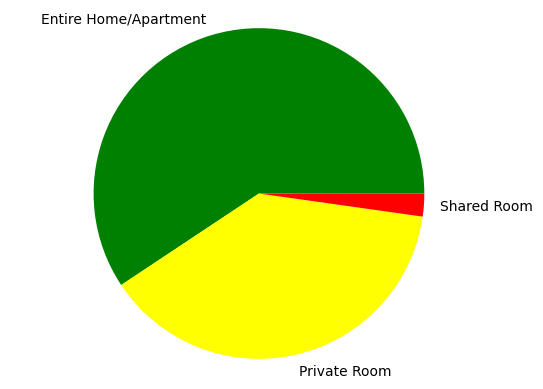

In [15]:
#visualize

home = (Df_dataset['room_type'] == 1).sum() 
pvtRoom = (Df_dataset['room_type'] == 2).sum()
shrdRoom = (Df_dataset['room_type'] == 3).sum()

print(home)
print(pvtRoom)
print(shrdRoom)

p = [home, pvtRoom, shrdRoom]
plt.pie(p, #giving array
        labels = ['Entire Home/Apartment', 'Private Room', 'Shared Room'],#Correspndingly giving labels
        colors = ['green', 'yellow','red'], # Corresponding colors
        startangle=0) #How much the gap should me there between the pie) #what start angle should be given
plt.axis('equal') 
plt.show()